# get percent of UNKNOWN vaccine type

In [96]:
import pandas as pd

# Assuming you have your datasets in a specified directory
base_path = "/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/"

total_vax_reports = 0
unk_vax_reports = 0

for year in range(1990, 2024):
    vax_file_path = f"{base_path}{year}VAERSVAX.csv"
    
    try:
        # Load vaccine data
        vax_df = pd.read_csv(vax_file_path, encoding='ISO-8859-1')

        # Update counts
        total_vax_reports += len(vax_df)
        unk_vax_reports += len(vax_df[vax_df['VAX_TYPE'] == "UNK"])

    except FileNotFoundError:
        print(f"File not found for year {year}.")
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Calculating the percentage
if total_vax_reports > 0:
    unk_percentage = (unk_vax_reports / total_vax_reports) * 100
    print(f"Percentage of VAERS reports with VAX_TYPE as 'UNK': {unk_percentage:.2f}%")
else:
    print("No vaccine reports found.")


Percentage of VAERS reports with VAX_TYPE as 'UNK': 1.10%


# Most common symptoms from 1990 to 2023

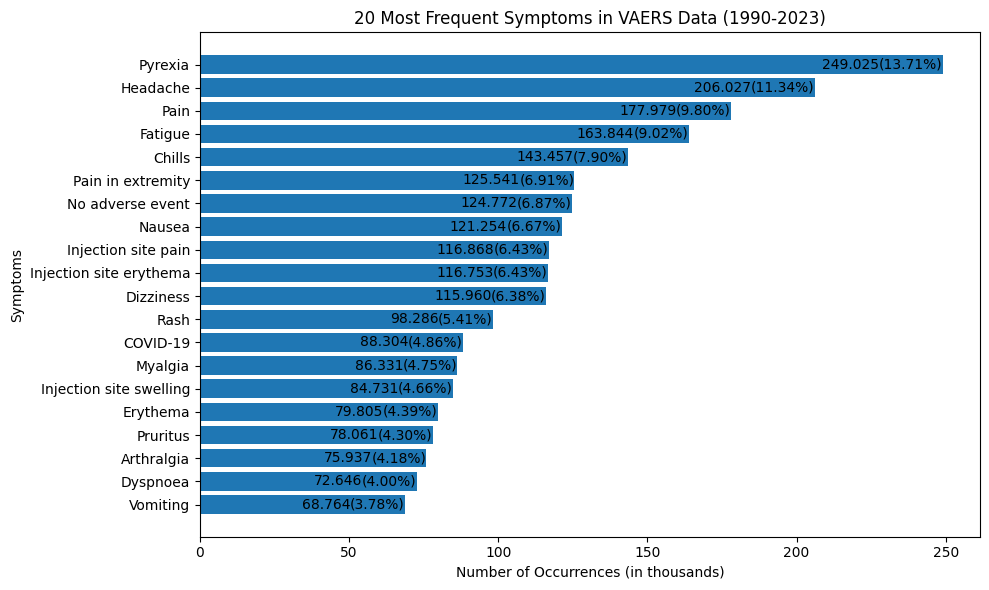

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

all_years_symptoms = pd.DataFrame()
for year in range(1990, 2024):
    file_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSSYMPTOMS.csv"
    yearly_symptoms_df = pd.read_csv(file_path, encoding='ISO-8859-1')
    all_years_symptoms = pd.concat([all_years_symptoms, yearly_symptoms_df])

all_symptoms = pd.concat([all_years_symptoms['SYMPTOM1'], all_years_symptoms['SYMPTOM2'], 
                          all_years_symptoms['SYMPTOM3'], all_years_symptoms['SYMPTOM4'], 
                          all_years_symptoms['SYMPTOM5']])

most_common_symptoms = all_symptoms.value_counts().head(20)
all_years_symptoms = all_years_symptoms.drop_duplicates(subset="VAERS_ID")

unique_entrys = len(all_years_symptoms) 

plt.figure(figsize=(10, 6))
bars = plt.barh(most_common_symptoms.index, most_common_symptoms.values)

plt.title('20 Most Frequent Symptoms in VAERS Data (1990-2023)')
plt.xlabel('Number of Occurrences (in thousands)')
plt.ylabel('Symptoms')

# Adding the text inside the bars and the percentage
total_count = most_common_symptoms.sum()
for bar in bars:
    label = f'{bar.get_width():,.0f}'.replace(',', '.')  # Format the number with a dot as a thousands separator
    percentage = (bar.get_width() / unique_entrys) * 100
    if bar.get_width() > 200000:
        total_offset = -40500
        percent_offset = -21500
    elif bar.get_width() > 100000:
        total_offset = -37500
        percent_offset = -18500
    else:
        total_offset = -34500
        percent_offset = -18500
    
    x_position = bar.get_width()
    plt.text(x_position + total_offset, bar.get_y() + bar.get_height() / 2,
             label,
             va='center', ha='left', color='black')
    
    # Add percentage next to the total number
    plt.text(x_position + percent_offset, bar.get_y() + bar.get_height() / 2,
             f'({percentage:.2f}%)',
             va='center', ha='left', color='black')

plt.gca().invert_yaxis()  # Invert y-axis to have the most common symptom at the top

# Format x-axis labels in thousands
def format_thousands(x, pos):
    return f'{x/1000:.0f}'

formatter = FuncFormatter(format_thousands)
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Symptoms/Top20Symptoms_alltime.png')
plt.show()


In [156]:
all_years_symptoms

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,25001,Agitation,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25003,Delirium,8.1,Hypokinesia,8.1,Hypotonia,8.1,NaN,NaN,NaN,NaN
2,25004,Chills,8.1,Dermatitis contact,8.1,Oedema genital,8.1,Pelvic pain,8.1,NaN,NaN
3,25005,Arthritis,8.1,Injection site oedema,8.1,Injection site reaction,8.1,NaN,NaN,NaN,NaN
4,25006,Convulsion,8.1,Dizziness,8.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
127069,2717536,Pain in extremity,26.1,Peripheral swelling,26.1,NaN,NaN,NaN,NaN,NaN,NaN
127070,2717537,Liver transplant,26.1,Malaise,26.1,NaN,NaN,NaN,NaN,NaN,NaN
127071,2717538,Breast cancer,26.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127072,2717539,Asthenia,26.1,Asthenopia,26.1,Fatigue,26.1,Gait inability,26.1,Lymphadenitis,26.1


In [144]:
x_position

48264

# Now for people that got vaccinated with the COVID-19 vaccine

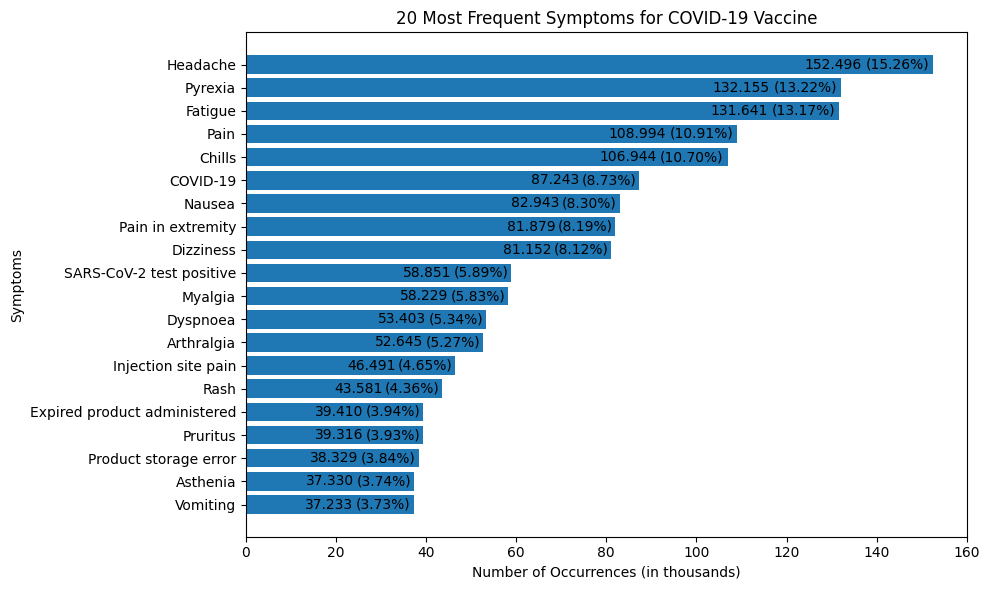

'i'

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming you have your datasets in a specified directory
base_path = "/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/"

all_covid_symptoms = pd.DataFrame()
unique_entrys = 0

for year in range(2020, 2024):  # Adjust the years as per your data availability
    vax_file_path = f"{base_path}{year}VAERSVAX.csv"
    symptoms_file_path = f"{base_path}{year}VAERSSYMPTOMS.csv"
    
    # Load vaccine data
    vax_df = pd.read_csv(vax_file_path, encoding='ISO-8859-1')

    # Exclude any VAX_TYPE that contains "COVID" or is "UNK"
    covid_vax_ids = vax_df[vax_df['VAX_TYPE'].str.contains("COVID")]['VAERS_ID']
    #drop duplicate ids
    covid_vax_ids = covid_vax_ids.drop_duplicates()

    # Load symptoms data and filter based on non-COVID-19 and non-unknown vaccine IDs
    symptoms_df = pd.read_csv(symptoms_file_path, encoding='ISO-8859-1')
    covid_symptoms_df = symptoms_df[symptoms_df['VAERS_ID'].isin(covid_vax_ids)]
   
    
    # Combine all symptom columns
    covid_all_symptoms = pd.concat([
        covid_symptoms_df['SYMPTOM1'], covid_symptoms_df['SYMPTOM2'], 
        covid_symptoms_df['SYMPTOM3'], covid_symptoms_df['SYMPTOM4'], 
        covid_symptoms_df['SYMPTOM5']
    ])
    all_covid_symptoms = pd.concat([all_covid_symptoms, covid_all_symptoms])
    covid_vax_ids = covid_symptoms_df.drop_duplicates(subset="VAERS_ID")
    unique_entrys += len(covid_vax_ids)

# Counting the occurrences of each symptom
most_common_non_covid_and_unknown_symptoms = all_covid_symptoms.value_counts().head(20)

# Convert the Series to a DataFrame
df = most_common_non_covid_and_unknown_symptoms.reset_index()
df.columns = ['Symptom', 'Count']

# Sorting the DataFrame
df = df.sort_values(by='Count', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Symptom'], df['Count'])  # Divide the count by 1000 to convert to thousands

# Adding labels and title
plt.xlabel('Number of Occurrences (in thousands)')
plt.ylabel('Symptoms')
plt.title('20 Most Frequent Symptoms for COVID-19 Vaccine')

# Adding the text inside the bars with thousands separator
for bar in bars:
    label = f'{bar.get_width():,.0f}'.replace(',', '.')  # Format the number with a dot as a thousands separator
    percentage = (bar.get_width() / unique_entrys) * 100
    if bar.get_width() > 100000:
        total_offset = -28500
        percent_offset = -15000
    else:
        total_offset = -24000
        percent_offset = -12750
    
    x_position = bar.get_width()
    plt.text(x_position + total_offset, bar.get_y() + bar.get_height() / 2,
             label,
             va='center', ha='left', color='black')
    
    # Add percentage next to the total number
    plt.text(x_position + percent_offset, bar.get_y() + bar.get_height() / 2,
             f'({percentage:.2f}%)',
             va='center', ha='left', color='black')
    


# Format x-axis labels in thousands
def format_thousands(x, pos):
    return f'{x/1000:.0f}'

formatter = FuncFormatter(format_thousands)
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Symptoms/Top20Symptoms_COVID.png')
plt.show()
"i"

In [5]:
all_covid_symptoms

,0
44686,Hypoaesthesia
44701,Headache
44707,Erythema
44726,Dizziness
44727,Dysgeusia
...,...
127065,NaN
127066,NaN
127071,NaN
127072,Lymphadenitis


# Now for every other vaccine besides COVID-19

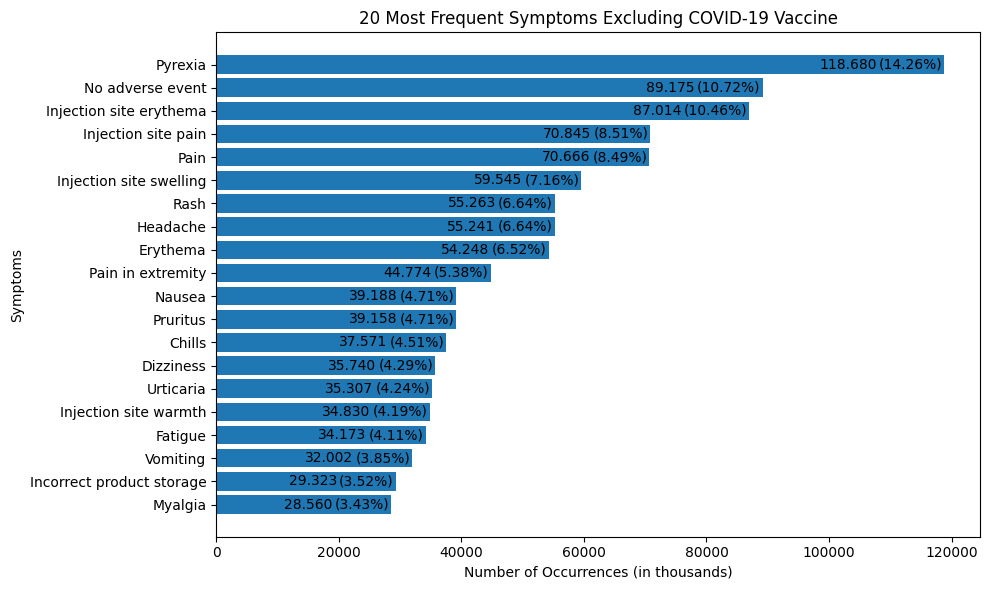

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your datasets in a specified directory
base_path = "/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/"

all_non_covid_and_unknown_symptoms = pd.DataFrame()
unique_entrys = 0

for year in range(1990, 2024):  # Adjust the years as per your data availability
    vax_file_path = f"{base_path}{year}VAERSVAX.csv"
    symptoms_file_path = f"{base_path}{year}VAERSSYMPTOMS.csv"
    
    # Load vaccine data
    vax_df = pd.read_csv(vax_file_path, encoding='ISO-8859-1')

    # Exclude any VAX_TYPE that contains "COVID" or is "UNK"
    non_covid_or_unknown_vax_ids = vax_df[~vax_df['VAX_TYPE'].str.contains("COVID")]['VAERS_ID']
    #drop duplicate ids

    # Load symptoms data and filter based on non-COVID-19 and non-unknown vaccine IDs
    symptoms_df = pd.read_csv(symptoms_file_path, encoding='ISO-8859-1')
    non_covid_or_unknown_symptoms_df = symptoms_df[symptoms_df['VAERS_ID'].isin(non_covid_or_unknown_vax_ids)]
    
    # non_covid_or_unknown_vax_ids can also include ids which are in covid_vax_ids due to multiple vaccines for one VAERS ID hence the same symptoms are used in both plots and the numbers don't add up 
    
    # Combine all symptom columns
    non_covid_or_unknown_all_symptoms = pd.concat([
        non_covid_or_unknown_symptoms_df['SYMPTOM1'], non_covid_or_unknown_symptoms_df['SYMPTOM2'], 
        non_covid_or_unknown_symptoms_df['SYMPTOM3'], non_covid_or_unknown_symptoms_df['SYMPTOM4'], 
        non_covid_or_unknown_symptoms_df['SYMPTOM5']
    ])
    all_non_covid_and_unknown_symptoms = pd.concat([all_non_covid_and_unknown_symptoms, non_covid_or_unknown_all_symptoms])
    
    non_covid_or_unknown_vax_ids = non_covid_or_unknown_symptoms_df.drop_duplicates(subset="VAERS_ID")
    unique_entrys += len(non_covid_or_unknown_vax_ids)
    
# Counting the occurrences of each symptom
most_common_non_covid_and_unknown_symptoms = all_non_covid_and_unknown_symptoms.value_counts().head(20)

# Convert the Series to a DataFrame
df = most_common_non_covid_and_unknown_symptoms.reset_index()
df.columns = ['Symptom', 'Count']

# Sorting the DataFrame
df = df.sort_values(by='Count', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Symptom'], df['Count'])  # Divide the count by 1000 to convert to thousands

# Adding labels and title
plt.xlabel('Number of Occurrences (in thousands)')
plt.ylabel('Symptoms')
plt.title('20 Most Frequent Symptoms Excluding COVID-19 Vaccine')

# Adding the text inside the bars with thousands separator
for bar in bars:
    label = f'{bar.get_width():,.0f}'.replace(',', '.')  # Format the number with a dot as a thousands separator
    percentage = (bar.get_width() / unique_entrys) * 100
    if bar.get_width() > 100000:
        total_offset = -20250
        percent_offset = -10500
    elif bar.get_width() > 80000:
        total_offset = -19000
        percent_offset = -10750
    else:
        total_offset = -17500
        percent_offset = -9250
    
    x_position = bar.get_width()
    plt.text(x_position + total_offset, bar.get_y() + bar.get_height() / 2,
             label,
             va='center', ha='left', color='black')
    
    # Add percentage next to the total number
    plt.text(x_position + percent_offset, bar.get_y() + bar.get_height() / 2,
             f'({percentage:.2f}%)',
             va='center', ha='left', color='black')

plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Symptoms/Top20Symptoms_ExcludingCOVID.png')
plt.show()


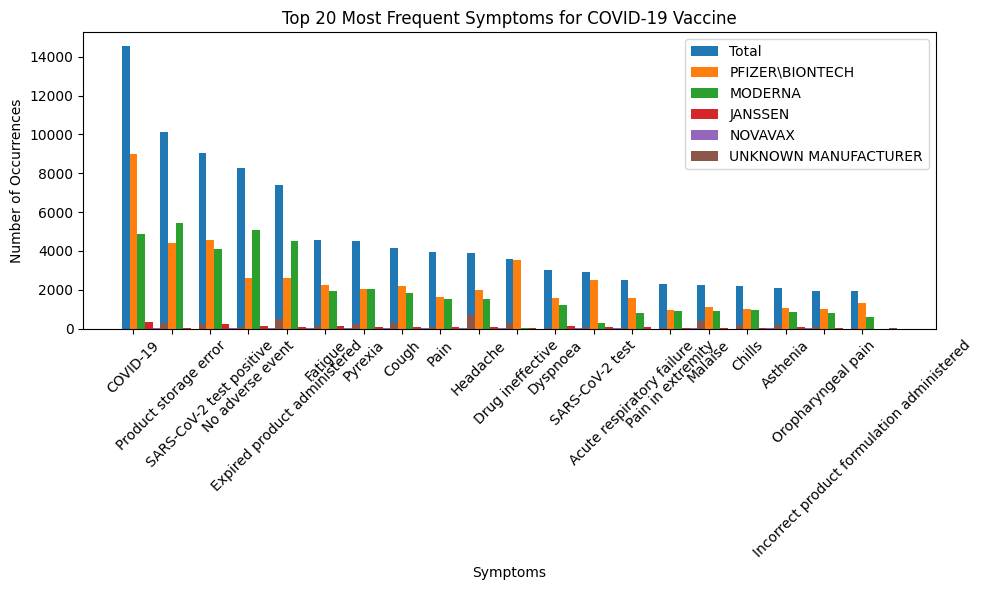

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your datasets in a specified directory
base_path = "/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/"

# Specify the manufacturers to include
target_manufacturers = ['PFIZER\\BIONTECH', 'MODERNA', 'JANSSEN', 'NOVAVAX', 'UNKNOWN MANUFACTURER']

# Initialize a dictionary to store symptoms per manufacturer
symptoms_per_manufacturer = {}

# Load vaccine data and symptoms data for all years at once
for year in range(2023, 2024):
    vax_file_path = f"{base_path}{year}VAERSVAX.csv"
    symptoms_file_path = f"{base_path}{year}VAERSSYMPTOMS.csv"
    
    vax_df = pd.read_csv(vax_file_path, encoding='ISO-8859-1')

    # Filter vaccine data to include only the specified manufacturers
    vax_df = vax_df[vax_df['VAX_MANU'].isin(target_manufacturers)]

    # Get unique VAERS_IDs for the filtered vaccine data
    filtered_vax_ids = vax_df['VAERS_ID'].drop_duplicates()

    symptoms_df = pd.read_csv(symptoms_file_path, encoding='ISO-8859-1')
    
    # Filter symptoms data based on the filtered vaccine IDs
    filtered_symptoms_df = symptoms_df[symptoms_df['VAERS_ID'].isin(filtered_vax_ids)]

    # Count symptoms per manufacturer
    for _, row in filtered_symptoms_df.iterrows():
        manufacturer = vax_df.loc[vax_df['VAERS_ID'] == row['VAERS_ID'], 'VAX_MANU'].iloc[0]
        symptoms = row[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']]
        for symptom in symptoms:
            if pd.notna(symptom):
                symptoms_per_manufacturer.setdefault(manufacturer, {}).setdefault(symptom, 0)
                symptoms_per_manufacturer[manufacturer][symptom] += 1

# Convert the dictionary to DataFrame
df = pd.DataFrame(symptoms_per_manufacturer).fillna(0)
manu_symptoms_sum = df.sum(axis=0)

# Sum the counts of each symptom across all manufacturers
total_counts = df.sum(axis=1)
total_symptoms = total_counts.sum()

# Select the top 20 most frequent symptoms
top_20_symptoms = total_counts.sort_values(ascending=False).head(20)

# Reorder the manufacturers
ordered_manufacturers = ['Total'] + [manu for manu in target_manufacturers if manu in df.columns]

# Plotting
plt.figure(figsize=(10, 6))

# Plotting only the top 20 symptoms
bar_width = 0.2
index = range(len(top_20_symptoms))
plt.bar(index, top_20_symptoms, width=bar_width, label='Total')

# Adding bars for each manufacturer
for i, manufacturer in enumerate(ordered_manufacturers[1:]):
    plt.bar([x + bar_width * (i + 1) for x in index], df[manufacturer][top_20_symptoms.index], width=bar_width, label=manufacturer)

# Adding labels and title
plt.xlabel('Symptoms')
plt.ylabel('Number of Occurrences')
plt.title('Top 20 Most Frequent Symptoms for COVID-19 Vaccine')
plt.xticks([x + bar_width for x in index], top_20_symptoms.index, rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()  # Show legend

plt.tight_layout()
plt.show()


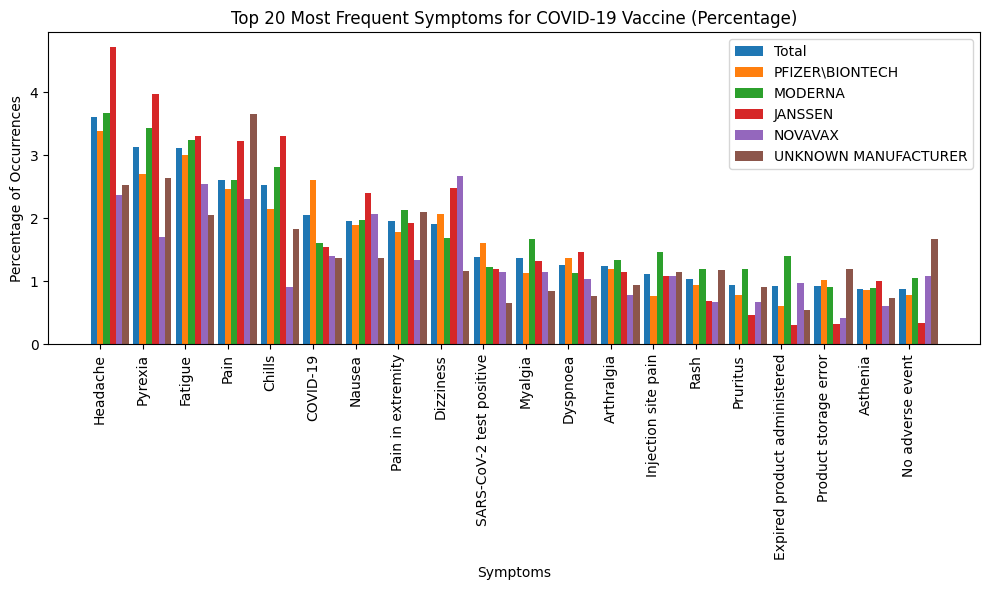

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your datasets in a specified directory
base_path = "/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/"

# Specify the manufacturers to include
target_manufacturers = ['PFIZER\\BIONTECH', 'MODERNA', 'JANSSEN', 'NOVAVAX', 'UNKNOWN MANUFACTURER']

# Initialize a dictionary to store symptoms per manufacturer
symptoms_per_manufacturer = {}

# Load vaccine data and symptoms data for all years at once
for year in range(2020, 2024):
    vax_file_path = f"{base_path}{year}VAERSVAX.csv"
    symptoms_file_path = f"{base_path}{year}VAERSSYMPTOMS.csv"
    
    vax_df = pd.read_csv(vax_file_path, encoding='ISO-8859-1')

    # Filter vaccine data to include only the specified manufacturers
    vax_df = vax_df[vax_df['VAX_MANU'].isin(target_manufacturers)]

    # Get unique VAERS_IDs for the filtered vaccine data
    filtered_vax_ids = vax_df['VAERS_ID'].drop_duplicates()

    symptoms_df = pd.read_csv(symptoms_file_path, encoding='ISO-8859-1')
    
    # Filter symptoms data based on the filtered vaccine IDs
    filtered_symptoms_df = symptoms_df[symptoms_df['VAERS_ID'].isin(filtered_vax_ids)]

    # Count symptoms per manufacturer
    for _, row in filtered_symptoms_df.iterrows():
        manufacturer = vax_df.loc[vax_df['VAERS_ID'] == row['VAERS_ID'], 'VAX_MANU'].iloc[0]
        symptoms = row[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']]
        for symptom in symptoms:
            if pd.notna(symptom):
                symptoms_per_manufacturer.setdefault(manufacturer, {}).setdefault(symptom, 0)
                symptoms_per_manufacturer[manufacturer][symptom] += 1

# Convert the dictionary to DataFrame
df = pd.DataFrame(symptoms_per_manufacturer).fillna(0)
manu_symptoms_sum = df.sum(axis=0)

# Sum the counts of each symptom across all manufacturers
total_counts = df.sum(axis=1)
total_symptoms = total_counts.sum()

top_20_symptoms = total_counts.sort_values(ascending=False).head(20)

# Select the top 20 most frequent symptoms and calculate percentages
top_20_symptoms_percentage = (top_20_symptoms / total_symptoms) * 100

# Calculate percentages for each manufacturer
manufacturer_percentages = {}
for manufacturer in target_manufacturers:
    manufacturer_percentages[manufacturer] = (df[manufacturer] / manu_symptoms_sum[manufacturer]) * 100

# Reorder the manufacturers
ordered_manufacturers = ['Total'] + [manu for manu in target_manufacturers if manu in df.columns]

# Plotting
plt.figure(figsize=(10, 6))

# Plotting only the top 20 symptoms (in percentage)
bar_width = 0.15
index = range(len(top_20_symptoms_percentage))
plt.bar(index, top_20_symptoms_percentage, width=bar_width, label='Total')

# Adding bars for each manufacturer (in percentage)
for i, manufacturer in enumerate(ordered_manufacturers[1:]):
    plt.bar([x + bar_width * (i + 1) for x in index], manufacturer_percentages[manufacturer][top_20_symptoms.index], width=bar_width, label=manufacturer)

# Adding labels and title
plt.xlabel('Symptoms')
plt.ylabel('Percentage of Occurrences')
plt.title('Top 20 Most Frequent Symptoms for COVID-19 Vaccine (Percentage)')
plt.xticks([x + bar_width for x in index], top_20_symptoms.index, rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()  # Show legend

plt.tight_layout()
plt.show()


In [148]:
total_counts

Blood pressure orthostatic abnormal        2.0
COVID-19                               14531.0
Coma                                      17.0
Computerised tomogram                    566.0
Exposure to SARS-CoV-2                   432.0
                                        ...   
Peripheral paralysis                       1.0
Spinal cord abscess                        1.0
Disturbance in sexual arousal              1.0
Genital hypoaesthesia                      1.0
Retinogram normal                          1.0
Length: 6797, dtype: float64

In [149]:
total_counts.sum()

273252.0

In [151]:
df

,JANSSEN,PFIZER\BIONTECH,UNKNOWN MANUFACTURER,MODERNA,NOVAVAX
Suspected COVID-19,359.0,1074.0,4.0,122.0,0.0
Vaccination failure,439.0,3086.0,827.0,97.0,0.0
SARS-CoV-2 test,584.0,9736.0,102.0,2442.0,0.0
Nervousness,16.0,186.0,9.0,76.0,1.0
Wrong product administered,46.0,965.0,115.0,1114.0,12.0
...,...,...,...,...,...
Respiratory tract haemorrhage,0.0,0.0,0.0,1.0,0.0
Oestrogen receptor assay negative,0.0,0.0,0.0,0.0,1.0
Time perception altered,0.0,0.0,0.0,0.0,1.0
Infusion site reaction,0.0,0.0,0.0,0.0,1.0


In [152]:
manu_symptoms_sum

JANSSEN                  46096.0
PFIZER\BIONTECH         452329.0
UNKNOWN MANUFACTURER     21337.0
MODERNA                 364663.0
NOVAVAX                    767.0
dtype: float64

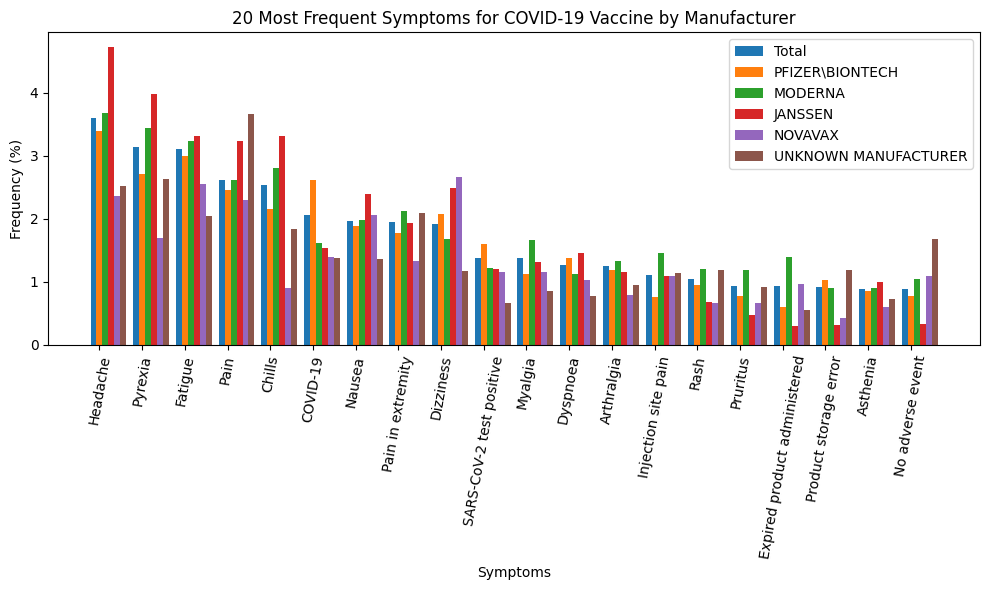

In [166]:
plt.figure(figsize=(10, 6))

# Plotting only the top 20 symptoms (in percentage)
bar_width = 0.14
index = range(len(top_20_symptoms_percentage))
plt.bar(index, top_20_symptoms_percentage, width=bar_width, label='Total')

# Adding bars for each manufacturer (in percentage)
for i, manufacturer in enumerate(ordered_manufacturers[1:]):
    plt.bar([x + bar_width * (i + 1) for x in index], manufacturer_percentages[manufacturer][top_20_symptoms.index], width=bar_width, label=manufacturer)

# Adding labels and title
plt.xlabel('Symptoms')
plt.ylabel('Frequency (%)')
plt.title('20 Most Frequent Symptoms for COVID-19 Vaccine by Manufacturer')

plt.xticks([x + bar_width for x in index], top_20_symptoms.index, rotation=80)  # Rotate x-axis labels for better visibility
plt.legend( prop = { "size": 10 })  # Show legend

plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Symptoms/Top20Symptoms_COVID_byManufacturer.png')
plt.show()

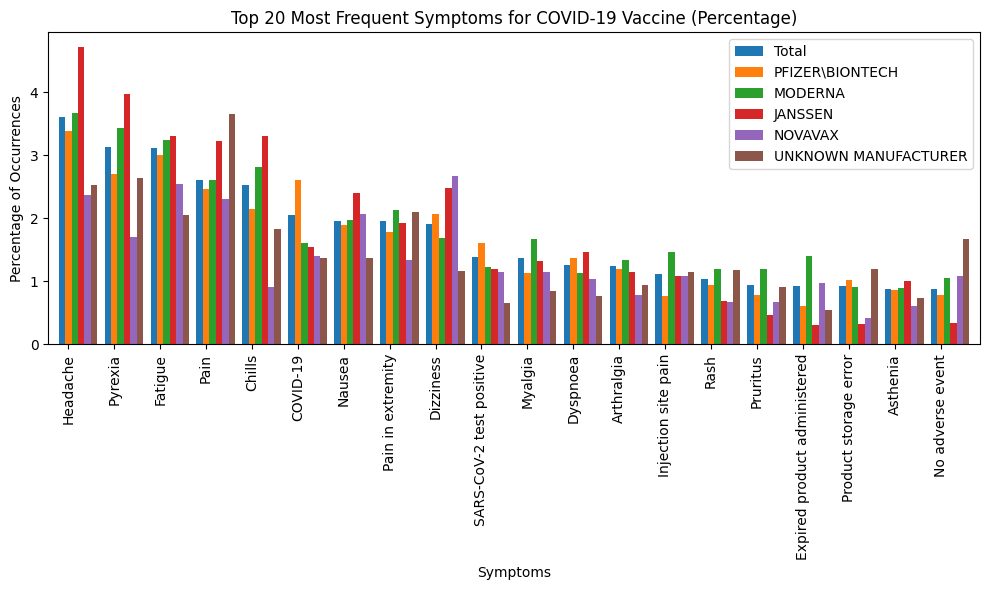

In [184]:
plt.figure(figsize=(10, 6))

# Plotting only the top 20 symptoms (in percentage)
bar_width = 0.14
index = range(len(top_20_symptoms_percentage))
plt.bar(index, top_20_symptoms_percentage, width=bar_width, label='Total')

# Adding bars for each manufacturer (in percentage)
for i, manufacturer in enumerate(ordered_manufacturers[1:]):
    plt.bar([x + bar_width * (i + 1) for x in index], manufacturer_percentages[manufacturer][top_20_symptoms.index], width=bar_width, label=manufacturer)

# Adding labels and title
plt.xlabel('Symptoms')
plt.ylabel('Percentage of Occurrences')
plt.title('Top 20 Most Frequent Symptoms for COVID-19 Vaccine (Percentage)')
plt.xticks([x + bar_width for x in index], top_20_symptoms.index, rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()  # Show legend

# Adjust x-axis limits to reduce space on the far left and far right
plt.xlim(-0.3, len(top_20_symptoms) +0)

plt.tight_layout()
plt.show()
